# Big Data Bootcamp Project: Diabetes Classifier!

In this notebook you will be using all the different tools and techinques you learned during the bootcamp to create your own project. Here's what you'll be doing:

1. Cleaning the data
2. Conducting exploratory data analysis (EDA)
3. Visualizing the data.
4. Splitting the dataset.
5. Creating a KNN classifier!

In the end, you'll have developed a classifier that can classify ----- based on various attributes!

In [ ]:
# Don't change this cell; just run it. 

import numpy as np
from math import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Part 1: Data Cleaning

Although the world is filled with accessible data, not all that data is immediately usable. You'll come to realize that a lot of data you find is very messy and dirty. So before you can start analyzing the data, you will need to do some cleaning.

First let's pull the data:

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Question 1:** Identify whether each column contains numerical or categorical data.

In [ ]:
Glucose = 'Numerical'

In [ ]:
Outcome = 'Categorical'

In [ ]:
BMI = 'Numerical'

**Question 2:** Drop the following column: SkinThickness

In [ ]:
dataset = dataset.drop(columns = ['SkinThickness'], axis = 1)
dataset.head(8)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
5,5,116,74,0,25.6,0.201,30,0
6,3,78,50,88,31.0,0.248,26,1
7,10,115,0,0,35.3,0.134,29,0


**Question 3:** We want to relabel some of the columns so that their names are easier to work with. Complete the following cell to relabel the columns as following: BloodPressure should be renamed as BP and Diabetes Pedigree Function should be renamed as DPF.

In [ ]:
dataset = dataset.rename(columns = {'BloodPressure': 'BP', 'Diabetes Pedigree Function': 'DPF'})
dataset.head(5)

,Pregnancies,Glucose,BP,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


**Question 4:** Let's see the Outcome column with 1 instead of Diabetic and 0 instead of Not Diabetic. Complete the following cell to create a new table. (Fill in the column names)

In [ ]:
new_tbl = dataset.copy(deep=True)
new_tbl['Outcome'] = list(dataset['Outcome'].map({0: "Not Diabetic", 1: "Diabetic"}))
new_tbl

,Pregnancies,Glucose,BP,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,Diabetic
1,1,85,66,0,26.6,0.351,31,Not Diabetic
2,8,183,64,0,23.3,0.672,32,Diabetic
3,1,89,66,94,28.1,0.167,21,Not Diabetic
4,0,137,40,168,43.1,2.288,33,Diabetic
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,Not Diabetic
764,2,122,70,0,36.8,0.340,27,Not Diabetic
765,5,121,72,112,26.2,0.245,30,Not Diabetic
766,1,126,60,0,30.1,0.349,47,Diabetic


Now the dataset is cleaned and ready to be used!

## Part 2: Exploratory Data Analysis

Now we can start the fun part: Exploratory Data Analysis (EDA)! EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. In other words, EDA is the process of understanding the story behind our data. This is a necessary step since we want to figure out which columns/rows would be important for model creation, what the relationships are between datasets/columns, and finally also figuring out which columns are important, and which aren't. 

Now that you know what EDA is, let's begin and get a better understanding of our data!

### General exploration

**Question 5 (Part 1):** Complete the following cell to find the total number of patients. 

Hint: Try using the .shape method! Remember .shape returns an array of the number of rows and columns. Think about what a row represent in the dataset.

In [ ]:
total_patients = new_tbl.shape[0]
total_patients

768

**Question 5 (Part 2):** Complete the following cell to find the total number of patients and the number of patients  that have diabetes. 

Hint: To find `num_diabetes`, think about why we converted the `Outcome` column to 1's and 0's. What does a 1 represent in the 'Outcome' column. What about 0?

In [ ]:
num_diabetes = new_tbl[(new_tbl['Outcome'] == 'Diabetic')].shape[0]
print('There were ' + str(total_patients) + ' patients, ' + str(num_diabetes) + ' with diabetes.')

There were 768 patients, 268 with diabetes.


**Question 6:** Find the number and percent of patients over 65 years old. 

Hint: How do we filter again? 

In [ ]:
# Hint: Number of Flights onboard = total_patients

# Number of patients over 65
num_over_65 = new_tbl[(new_tbl['Age'] > 65)].shape[0]

# Percent of patients over 65
percentage = (num_over_65/total_patients) * 100

print('There were ' + str(num_over_65) + ' patients over 65, which is ' + str(percentage) + '% of all patients.')

There were 13 patients over 65, which is 1.6927083333333333% of all patients.


### Descriptive statistics (mean, median, etc.)

**Question 7:** Find the mean BMI and Glucose of patients.

In [ ]:
mean_BMI = new_tbl['BMI'].mean()
mean_glucose = new_tbl['Glucose'].mean()
print('The mean BMI is ' + str(mean_BMI))
print('The mean Glucose is ' + str(mean_glucose))

The mean BMI is 31.992578124999998
The mean Glucose is 120.89453125


**Question 8:** Let's round those values so that they are easier to read.
Hint: Use the round method!

In [ ]:
rounded_mean_BMI = mean_BMI.round()
rounded_mean_glucose = mean_glucose.round()
print('The mean BMI is ' + str(rounded_mean_BMI))
print('The mean Glucose is ' + str(rounded_mean_glucose))

The mean BMI is 32.0
The mean Glucose is 121.0


**Question 9:** Find the median BMI and Glucose of the flights. Make sure to round the medians for BMI and glucose as well.


In [ ]:
rounded_median_BMI = new_tbl['BMI'].median().round()
rounded_median_glucose = new_tbl['Glucose'].median().round()
print('The median patient BMI ' + str(rounded_median_BMI))
print('The median patient Glucose is ' + str(rounded_median_glucose))

The median patient BMI 32.0
The median patient Glucose is 117.0


### Visualizations & Distributions

**Question 10:** Create a histogram that shows the distribution of Insulin levels.

<AxesSubplot: xlabel='Insulin', ylabel='Count'>

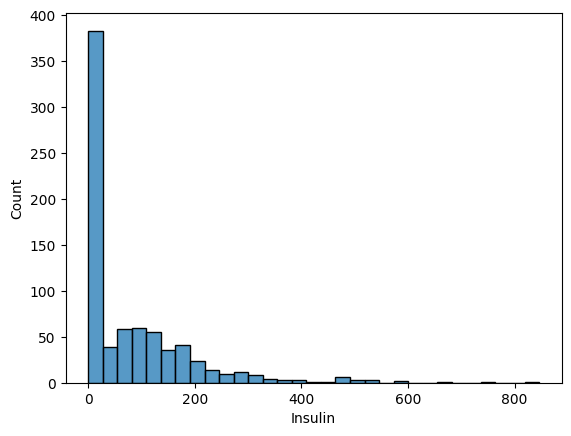

In [ ]:
sns.histplot(new_tbl['Insulin'])

**Question 11:** Create a histogram that shows the distribution of Glucose. Manipulate the bins to make the histogram look more readable.
Hint: In histplot, there is a variable 'bins' you can use!

<AxesSubplot: xlabel='Glucose', ylabel='Count'>

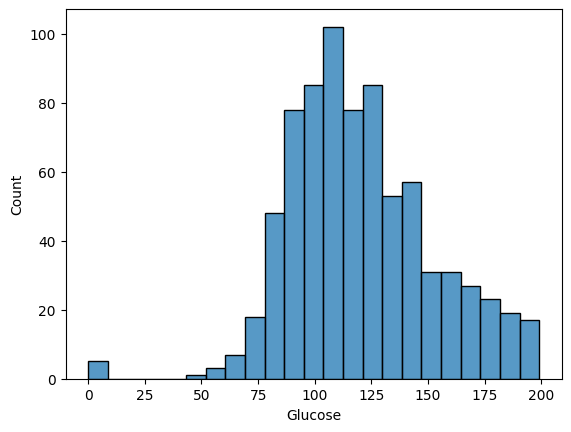

In [ ]:
sns.histplot(new_tbl['Glucose'])

**Question 12:** Create a bar chart to visualize the amount of patients with each pregnancy count.

Hint: You'll have to group the table values in a certain way before converting it into a bar chart.

<AxesSubplot: xlabel='Pregnancies', ylabel='Count'>

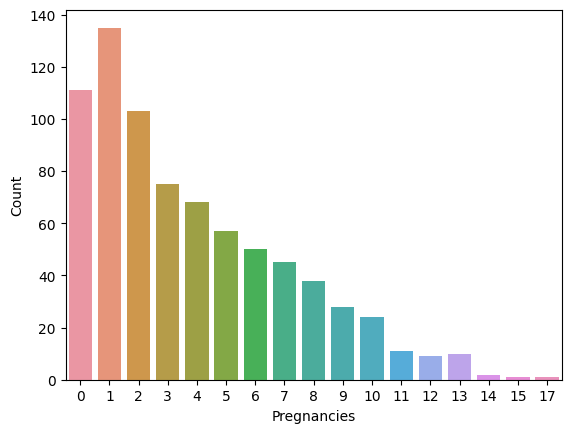

In [ ]:
class_count = dataset.groupby('Pregnancies').count()
class_count['Count'] = class_count['Glucose']
sns.barplot(x = class_count.index, y = class_count['Count'])

**Question 13:** Assign `BMI_Outcome` to a new table with only the `BMI` and `Outcome` columns.

In [ ]:
BMI_outcome = dataset.drop(columns = ['Pregnancies', 'Glucose', 'BP', 'Insulin', 'DiabetesPedigreeFunction', 'Age'])
BMI_outcome.head(5)

,BMI,Outcome
0,33.6,1
1,26.6,0
2,23.3,1
3,28.1,0
4,43.1,1


**Question 14:** Create a bar chart that visualizes the mean BMI for each class on the Titanic. Similar to Question 19, you'll have to group by `Class` before creating the bar chart.

<AxesSubplot: xlabel='Outcome', ylabel='BMI'>

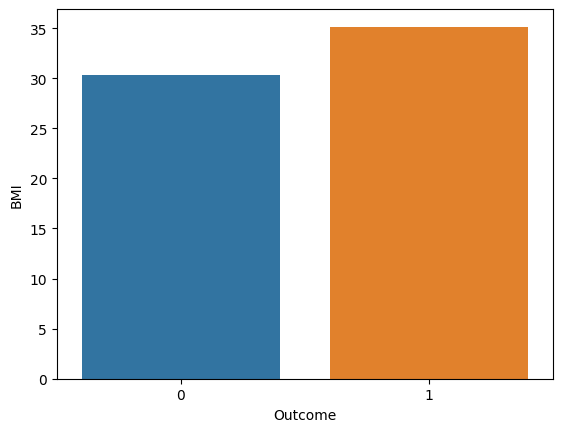

In [ ]:
class_grouped = BMI_outcome.groupby('Outcome').agg(np.mean)
sns.barplot(x = class_grouped.index, y = class_grouped['BMI'])

**Question 15:** Complete the next three cells to create a bar chart that visualizes the mean Glucose and Insulin for each Outcome. Follow the procedure from the last question if you get stuck.

In [ ]:
glucose_insulin = dataset.drop(columns = ['Pregnancies', 'BP', 'DiabetesPedigreeFunction', 'Age', 'BMI'])
glucose_insulin.head(5)

,Glucose,Insulin,Outcome
0,148,0,1
1,85,0,0
2,183,0,1
3,89,94,0
4,137,168,1


In [ ]:
outcome_grouped_gluc_ins = glucose_insulin.groupby('Outcome').agg(np.mean)
outcome_grouped_gluc_ins

,Glucose,Insulin
Outcome,,
0,109.980000,68.792000
1,141.257463,100.335821


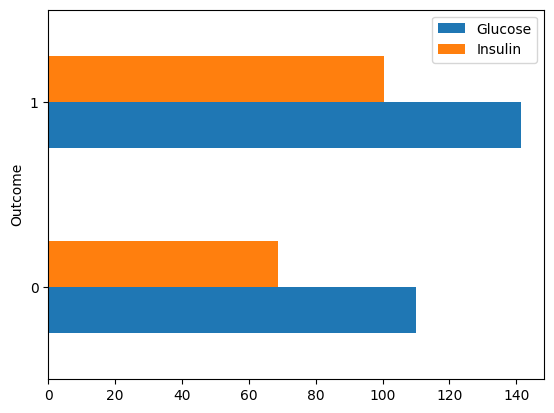

In [ ]:
outcome_grouped_gluc_ins.plot.barh();

**Question 16**: Run this cell to visualize the relationship between Glucose and Insulin. Do you see any correlation between glucose, insulin, and whether the patient was diagonsed with diabetes?


<AxesSubplot: xlabel='Glucose', ylabel='Insulin'>

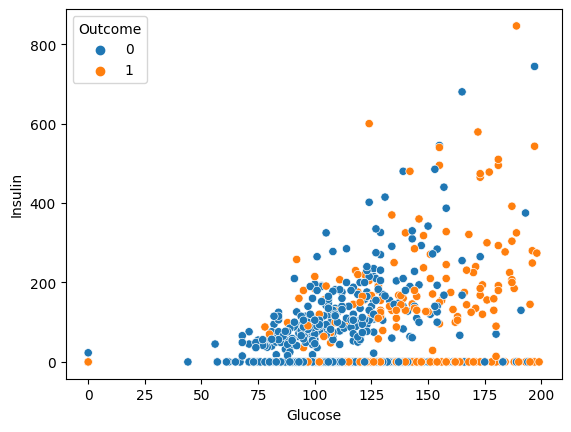

In [ ]:
sns.scatterplot(x = 'Glucose', y = 'Insulin', data=dataset, hue='Outcome')

**Answer Here:**

Now you should have a better understanding of the data! 

## Part 3: Splitting the Dataset

Now let's start creating our own machine learning model. But one very important step before that is splitting up the dataset. Splitting the Dataset involves splitting the dataset into two parts: a training set and testing set. Eventually we will be using our training set data to train our machine learning model, and then we will test our machine learning model with our testing data. 

First, let's pull up our clean datasets.

In [ ]:
dataset

,Pregnancies,Glucose,BP,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


**Question 17:** Fill in the `num_train` and `num_test` variables to get the number of rows in each category. Then use the `take` method to get tables for `train_data` and `test_data` Use the `training_proportion` and `total` variables to do this. Make sure to make `num_train` and `num_test` are integers. 

Hint: In the `take` method, think about using `np.arange`!

In [ ]:
# Here we have defined the proportion of our data
# that we want to designate for training as 17/20ths
# of our total dataset.  3/20ths of the data is
# reserved for testing.

training_proportion = 17/20
total = dataset.shape[0]

num_train = int(total * training_proportion)
num_test = total - num_train

train_data = dataset.take(np.arange(num_train))
test_data = dataset.take(np.arange(num_train, total))

print("Training: ",   train_data.shape[0], ";",
      "Test: ",       test_data.shape[0])

Training:  652 ; Test:  116


In [ ]:
# Don't change the cell below, just run it!
# In this cell, we find the proportion of both the train and test data with each Outcome. 

diabetes_train = train_data[train_data['Outcome'] == 1].shape[0] / num_train
nodiabetes_train = train_data[train_data['Outcome'] == 0].shape[0] / num_train


diabetes_test = test_data[test_data['Outcome'] == 1].shape[0] / num_test
nodiabetes_test = test_data[test_data['Outcome'] == 0].shape[0] / num_test


Count = pd.DataFrame({
    'Outcome': np.array(["Yes", "No"]),
    'Train': np.array([diabetes_train, nodiabetes_train]),
    'Test': np.array([diabetes_train, nodiabetes_test])
})

Count = Count.T.iloc[1:]
Count

,0,1
Train,0.342025,0.657975
Test,0.342025,0.612069


Great, our proportions are similar in the train and test sets.  Now let's create a bar chart so that we can visualize the difference by survival to confirm this visually.

Text(0, 0.5, 'Prop Has Diabetes')

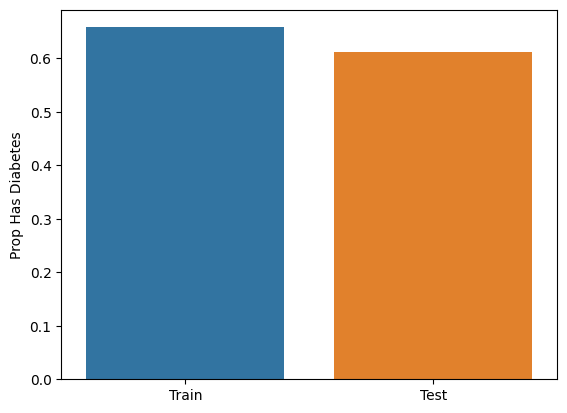

In [ ]:
#sns.barplot(x = Count.index)

sns.barplot(x = Count.index, y = Count[1])
plt.ylabel("Prop Has Diabetes")

# Part 4: Classification

Now that we've split our data into a training set and a test set, we are reading to perform K-nearest-neighbors classification! We will be using the attributes of each *patient* that we have in our dataset, such as their *age*, to classify *patients are diabetic or not*. In the end, we will use the testing set to test how accurate our model is at predicting whether a *patient is diabetic*.


### Visualization of KNN

**Question 34:** Below we have a scatter plot between BMI and Glucose for the first 100 patients. The points have been color coded with their respective delay.

**For the red dot below, with a k value of 3, would we say that this patient has or doesn't have diabetes?**

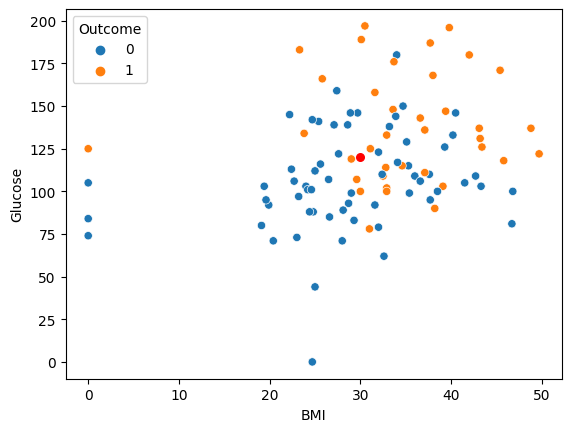

In [ ]:
# Don't Touch this! Just run it!
train_data_less = train_data.take(np.arange(0,100))
sns.scatterplot(x = 'BMI', y = 'Glucose', data = train_data_less, hue = 'Outcome')
plt.scatter(30, 120, color='red', s=30);

***Definition***

Standard Units: Converts a numerical value into a measure of distance from the mean using a value called the standard deviation.

**Question 18:** Create a function `standard_units()` that given an array, it returns standard units of each item in the array. In order to find standard units, you must subtract the mean of the array from each item in the array and then divide this by the standard deviation of the array (which we can find using np.std)

We want to convert to standard units so that we can compare all of the different features, which are currently in different units (ie. flight duration vs length). By putting them in standard units, we can easily compute distances later.

In [ ]:
def standard_units(arr):
    return (arr - np.mean(arr)) / np.std(arr)

**Question 19:** Now we need to make sure that each column of our dataset is standardized using the `standard_units()` function we just created. Create a function when given a unstandardized dataset, will return a standardized dataset.

Hint: Think about the `apply` function!

In [ ]:
# Dataset is either training or testing dataset with the same column names as original
def pipeline(dataset):
    
    # age_su = standard_units(dataset['Age'])
    # fare_su = standard_units(dataset['Fare'])
    # class_su = standard_units(dataset['Class'])
    # family_size_su = standard_units(dataset['Family_Size'])
    
    # table = pd.DataFrame({
    #     'Age': age_su,
    #     'Fare': fare_su,
    #     'Class': class_su,
    #     'Family Size': family_size_su,
    #     'Survived': dataset['Survived']
    # })
    
    # return table

    return_dataset = dataset.copy(deep = True)
    return_dataset.apply(standard_units)
    return_dataset["Outcome"] = dataset["Outcome"]

    return return_dataset

train = pipeline(train_data)
train.head()

,Pregnancies,Glucose,BP,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [ ]:
test = pipeline(test_data)
test.head()

,Pregnancies,Glucose,BP,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
652,5,123,74,77,34.1,0.269,28,0
653,2,120,54,0,26.8,0.455,27,0
654,1,106,70,135,34.2,0.142,22,0
655,2,155,52,540,38.7,0.240,25,1
656,2,101,58,90,21.8,0.155,22,0


Question: Why do you think we use standard units?

Answer: 

**Question 20:** Now we create a function `distances()` that will return a table that use the distance formula to calculate the all  each point in the training set and the new point from the test set.

In [ ]:
def distances(train, test_row):
    distances = np.array([])
    for row in np.arange(train.shape[0]):
        squares = np.array([])
        for column in np.arange(test.shape[1]):
            squares = np.append(squares, (train.iloc[row].iloc[column] - test_row.iloc[column]) ** 2)
        distances = np.append(distances, np.sum(squares)**1/2)
        
    return pd.DataFrame({
        'Distances': distances,
        'Train Outcome': train['Outcome']
    })

distance_table = distances(train, test.iloc[0])
distance_table

,Distances,Train Outcome
0,3522.189082,1
1,3759.128362,0
2,4885.901204,1
3,805.005202,0
4,4884.538180,1
...,...,...
647,5255.862298,1
648,1672.320041,1
649,3245.154248,0
650,1036.605613,0


**Question 21:** Now create a function `k_min()`that will take in the distance table from the function we just made, and find the k-nearest values. Then it should return whether or not this point should be classified as survived or not survived based on the k-nearest values.

In [ ]:
# Classifies a single row
def k_min(table, k):
    mins = table.sort_values(by = 'Distances', ascending = True).iloc[0:k]
    grouped = mins.groupby('Train Outcome').count().sort_values(by = 'Distances', ascending = False)
    return grouped.index[0]

    
k_min(distances(train,test.iloc[20]), 5)
#0 is classified as no diabetes 

0

Add comments to this code to describe what each line is doing!

**Question 22:** Let's put everything together! Create a function/classifier `KNN_classifier` that takes in a standardized training and test set, k value and associated testing labels (aka an array that shows whether each person in the testing dataset survived). 

Hint: this classifier should use your `distances()` and `k_min()` functions.

This cell might take a while to run!

In [ ]:
def KNN_classifer(train, test_data, k, test_labels):
    predictions = np.array([])
    for row in np.arange(test_data.shape[0]):
        dist_tbl = distances(train, test_data.iloc[row])
        predicted =  k_min(dist_tbl, k)
        predictions = np.append(predictions, predicted)
   
    return sum(predictions == test_data['Outcome'])/test_data.shape[0] 

#This example uses the first 50 points in the train set so it runs faster but remove it if you want to wait 
KNN_classifer(train.iloc[:50], test, 7, "Train Outcome")

0.5344827586206896

Congratulations!!! You have successfully created your very own machine learning model!

Give yourself a pat on your back! Not only did you create your own machine learning model, but you also cleaned your datasets, performed EDA, and even conducted your own A/B Test.


# Parting Thoughts from your instructors at BDAB!

It was great having you guys be a part of our family at BDAB! We really enjoyed working with you guys and teaching you cool and interesting Data Science concepts! We hope you use the tools and skills you used in your future endeavors!

Feel free reach out with us and share anything interesting you do with Python and NumPy!

## Thank you guys so much! We wish the best for your future endeavors! 😊

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ec783371-f802-4efd-b7c4-2133545ccd60' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>